# Dataset Download

We'll use the Kaggle's dataset Brain tumor multimodal image (CT & MRI)

https://www.kaggle.com/api/v1/datasets/download/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri

In [5]:
# ! curl -L -o raw_data/brain-tumor-multimodal-image-ct-and-mri.zip\ https://www.kaggle.com/api/v1/datasets/download/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri

In [1]:
! ls -l raw_data/brain*

-rw-r--r-- 1 maxkaizo maxkaizo 378311120 Jan  1 21:16 raw_data/brain-tumor-multimodal-image-ct-and-mri.zip


In [ ]:
# ! unzip raw_data/brain-tumor-multimodal-image-ct-and-mri.zip -d raw_data/

# Data Preparation

Lets get to know our dataset, first of all, lets see how many files, do we have an what is the folder structure

In [2]:
! tree -L 3 raw_data/Dataset

raw_data/Dataset
├── Brain Tumor CT scan Images
│   ├── CT image source.txt
│   ├── Healthy
│   │   ├── ct_healthy (1).jpg
│   │   ├── ct_healthy (1).png
│   │   ├── ct_healthy (10).jpg
│   │   ├── ct_healthy (10).png
│   │   ├── ct_healthy (100).jpg
│   │   ├── ct_healthy (100).png
│   │   ├── ct_healthy (1000).jpg
│   │   ├── ct_healthy (1001).jpg
│   │   ├── ct_healthy (1002).jpg
│   │   ├── ct_healthy (1003).jpg
│   │   ├── ct_healthy (1004).jpg
│   │   ├── ct_healthy (1005).jpg
│   │   ├── ct_healthy (1006).jpg
│   │   ├── ct_healthy (1007).jpg
│   │   ├── ct_healthy (1008).jpg
│   │   ├── ct_healthy (1009).jpg
│   │   ├── ct_healthy (101).jpg
│   │   ├── ct_healthy (101).png
│   │   ├── ct_healthy (1010).jpg
│   │   ├── ct_healthy (1011).jpg
│   │   ├── ct_healthy (1012).jpg
│   │   ├── ct_healthy (1013).jpg
│   │   ├── ct_healthy (1014).jpg
│   │   ├── ct_healthy (1015).jpg
│   │   ├── ct_healthy (1016).jpg
│   │   ├── ct_healthy (1017).jpg
│   │   ├── ct_healthy (1018).jpg
│   

The output is too long as we have 9260 files, so i'll create a inventory file including all file names and location, and then I'll make a summary of the distribution. (I'll only post here the resulting summary, to avoid unproductive logs)

In [3]:
! ! tree -L 4 raw_data/Dataset -o inventory.txt

At this point we have all the images in our environment, here's the file distribution

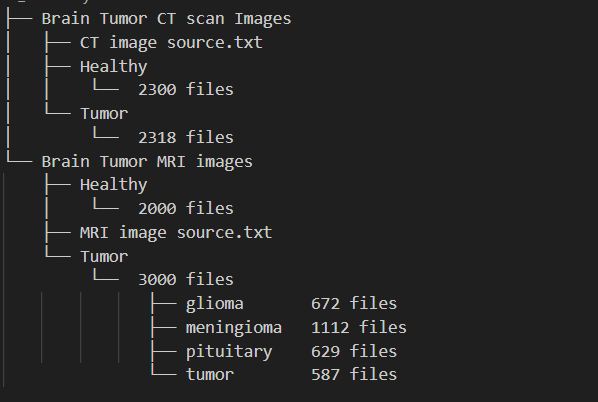

I have a decision to make here, I could identify the presence of a tumor for each method, adding up to 4 classes (CT healthy/tumor + MRI healthy/tumor), but for learning purposes I'll use also the tumor types available at MRI.

This may create an imbalance problem, but lets see the results.

So, I'll proceed with the split

In [4]:
! tree -fL 2 Dataset/

Dataset
├── Dataset/test
│   ├── Dataset/test/ct_healthy
│   ├── Dataset/test/ct_tumor
│   ├── Dataset/test/mri_glioma
│   ├── Dataset/test/mri_healthy
│   ├── Dataset/test/mri_meningioma
│   ├── Dataset/test/mri_pituitary
│   └── Dataset/test/mri_tumor
├── Dataset/train
│   ├── Dataset/train/ct_healthy
│   ├── Dataset/train/ct_tumor
│   ├── Dataset/train/mri_glioma
│   ├── Dataset/train/mri_healthy
│   ├── Dataset/train/mri_meningioma
│   ├── Dataset/train/mri_pituitary
│   └── Dataset/train/mri_tumor
└── Dataset/val
    ├── Dataset/val/ct_healthy
    ├── Dataset/val/ct_tumor
    ├── Dataset/val/mri_glioma
    ├── Dataset/val/mri_healthy
    ├── Dataset/val/mri_meningioma
    ├── Dataset/val/mri_pituitary
    └── Dataset/val/mri_tumor

25 directories, 0 files


In [5]:
!find Dataset -type d -exec sh -c 'echo "{}: $(find "{}" -type f | wc -l) files"' \;

Dataset: 9618 files
Dataset/test: 1445 files
Dataset/test/ct_tumor: 348 files
Dataset/test/mri_glioma: 101 files
Dataset/test/ct_healthy: 345 files
Dataset/test/mri_pituitary: 95 files
Dataset/test/mri_healthy: 300 files
Dataset/test/mri_meningioma: 167 files
Dataset/test/mri_tumor: 89 files
Dataset/val: 1443 files
Dataset/val/ct_tumor: 348 files
Dataset/val/mri_glioma: 101 files
Dataset/val/ct_healthy: 345 files
Dataset/val/mri_pituitary: 94 files
Dataset/val/mri_healthy: 300 files
Dataset/val/mri_meningioma: 167 files
Dataset/val/mri_tumor: 88 files
Dataset/train: 6730 files
Dataset/train/ct_tumor: 1622 files
Dataset/train/mri_glioma: 470 files
Dataset/train/ct_healthy: 1610 files
Dataset/train/mri_pituitary: 440 files
Dataset/train/mri_healthy: 1400 files
Dataset/train/mri_meningioma: 778 files
Dataset/train/mri_tumor: 410 files


# EDA - Exploratory Data Analysis

## Explore images

We will explore the dataset in greater detail to better understand it and try to identify general or structural patterns inherent to the data, enabling us to make better decisions in the model design process. We'll begin showing some random examples

Folder: Dataset/train/ct_tumor


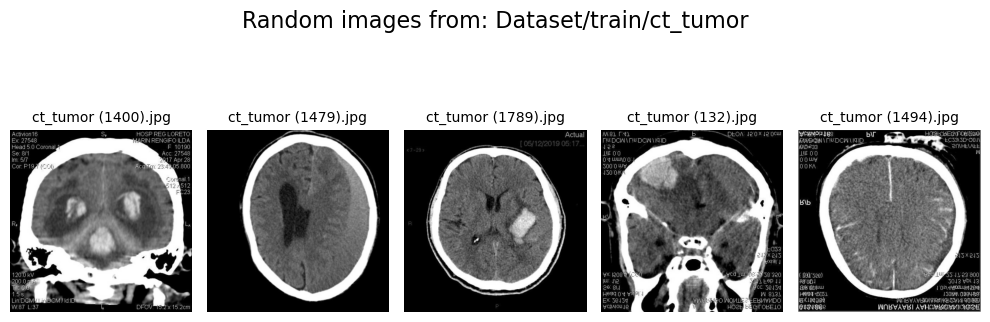

Folder: Dataset/train/mri_glioma


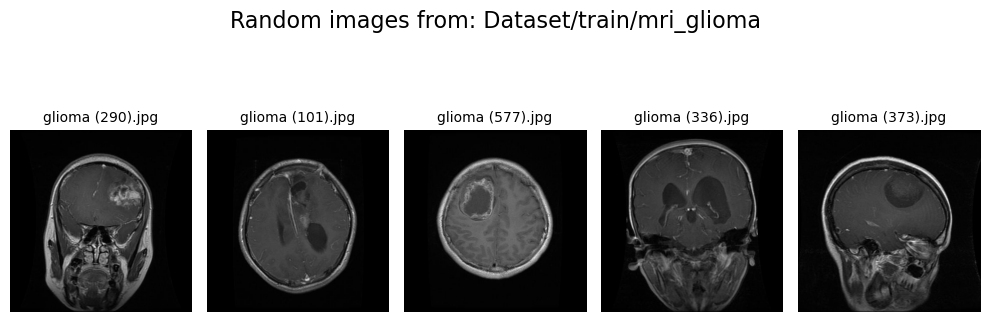

Folder: Dataset/train/ct_healthy


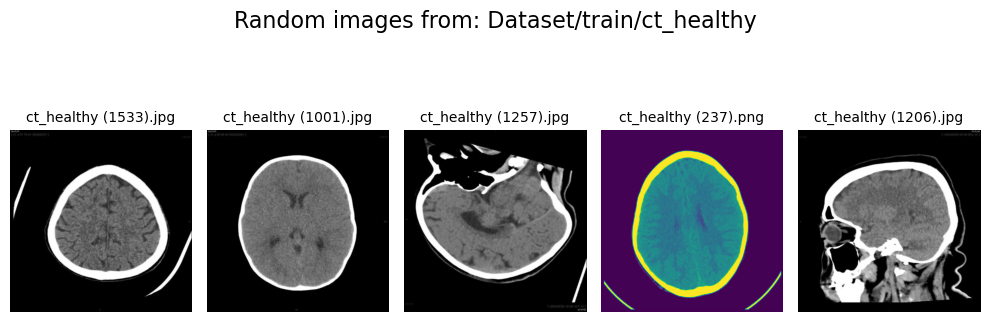

Folder: Dataset/train/mri_pituitary


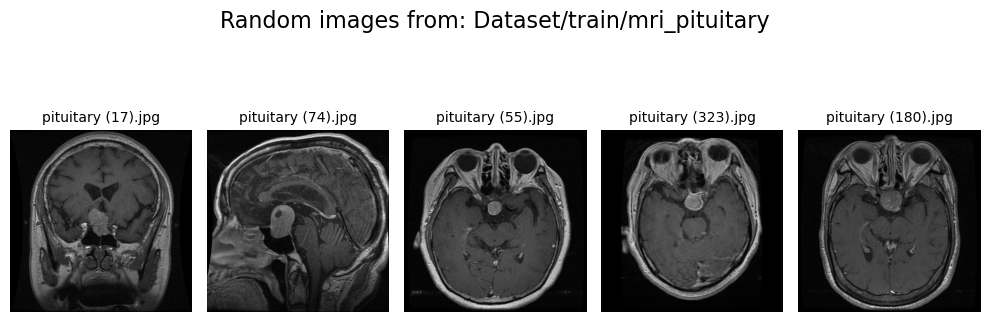

Folder: Dataset/train/mri_healthy


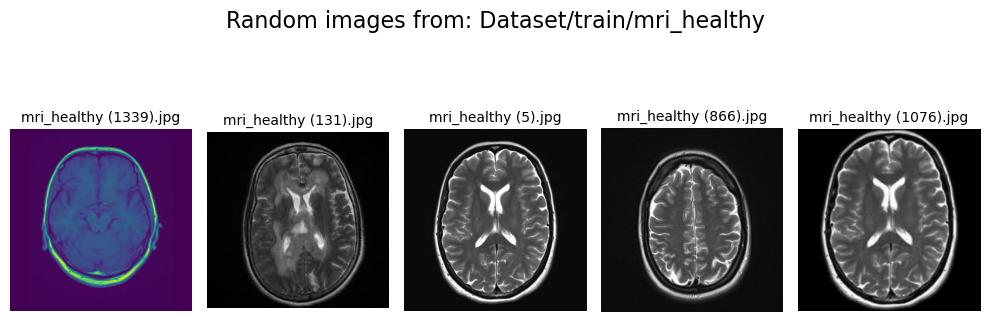

Folder: Dataset/train/mri_meningioma


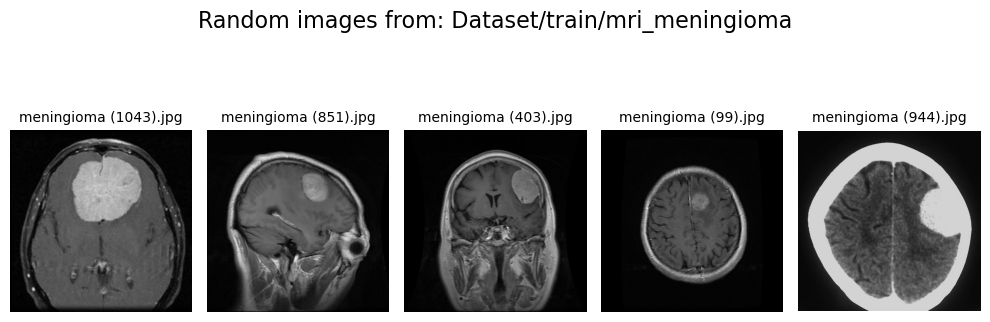

Folder: Dataset/train/mri_tumor


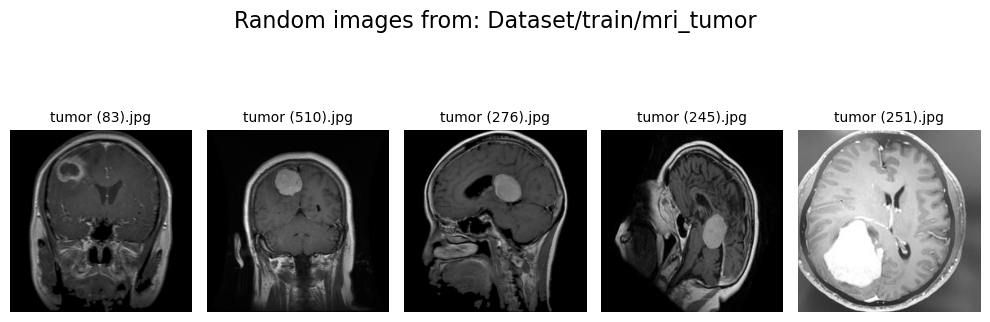

In [6]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Root directory of the dataset
root_dir = "Dataset/train"

# Number of random files to select per folder
num_samples = 5

# Dimensions to resize the images
resize_to = (250, 250)

# Traverse all folders
for root, dirs, files in os.walk(root_dir):
    if files:  # If the folder contains files
        full_paths = [os.path.join(root, f) for f in files]
        random_files = random.sample(full_paths, min(num_samples, len(full_paths)))
        print(f"Folder: {root}")
        
        # Create a plot with subplots
        fig, axes = plt.subplots(1, len(random_files), figsize=(10, 4))
        
        for ax, file in zip(axes, random_files):
            try:
                img = Image.open(file)
                # img = img.resize(resize_to)  # Resize the image
                ax.imshow(img)  # cmap="gray" is optional for grayscale images
                ax.set_title(os.path.basename(file), fontsize=10)
                ax.axis("off")  # Remove axes
            except Exception as e:
                print(f"Could not load image {file}: {e}")
        
        plt.suptitle(f"Random images from: {root}", fontsize=16)
        plt.tight_layout()
        plt.show()


There are some colored images, so let's examine their characteristics in detail, specifically the image mode of each file.

In [7]:
import os
from PIL import Image
from collections import defaultdict

# Main directory to traverse
directory = "Dataset"

# Use os.walk to traverse the directory and its subdirectories
for root, dirs, files in os.walk(directory):
    print(f"Current directory: {root}")
    
    # Dictionary to count image modes
    mode_count = defaultdict(int)
    
    # Count the modes of the images
    for file in files:
        full_path = os.path.join(root, file)
        try:
            with Image.open(full_path) as img:
                mode_count[img.mode] += 1  # Increment the counter for the mode
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    # Display the results for the current folder
    for mode, count in mode_count.items():
        print(f"Mode: {mode} | Count: {count}")
    
    print("-" * 40)


Current directory: Dataset
----------------------------------------
Current directory: Dataset/test
----------------------------------------
Current directory: Dataset/test/ct_tumor
Mode: RGB | Count: 338
Mode: L | Count: 10
----------------------------------------
Current directory: Dataset/test/mri_glioma
Mode: RGB | Count: 101
----------------------------------------
Current directory: Dataset/test/ct_healthy
Mode: L | Count: 59
Mode: RGB | Count: 285
Mode: RGBA | Count: 1
----------------------------------------
Current directory: Dataset/test/mri_pituitary
Mode: RGB | Count: 95
----------------------------------------
Current directory: Dataset/test/mri_healthy
Mode: L | Count: 37
Mode: RGB | Count: 262
Mode: RGBA | Count: 1
----------------------------------------
Current directory: Dataset/test/mri_meningioma
Mode: RGB | Count: 167
----------------------------------------
Current directory: Dataset/test/mri_tumor
Mode: RGB | Count: 79
Mode: L | Count: 10
------------------------

It also seems that some images have already been partialy augmented, as some of the images are rotated, as shown in this example:

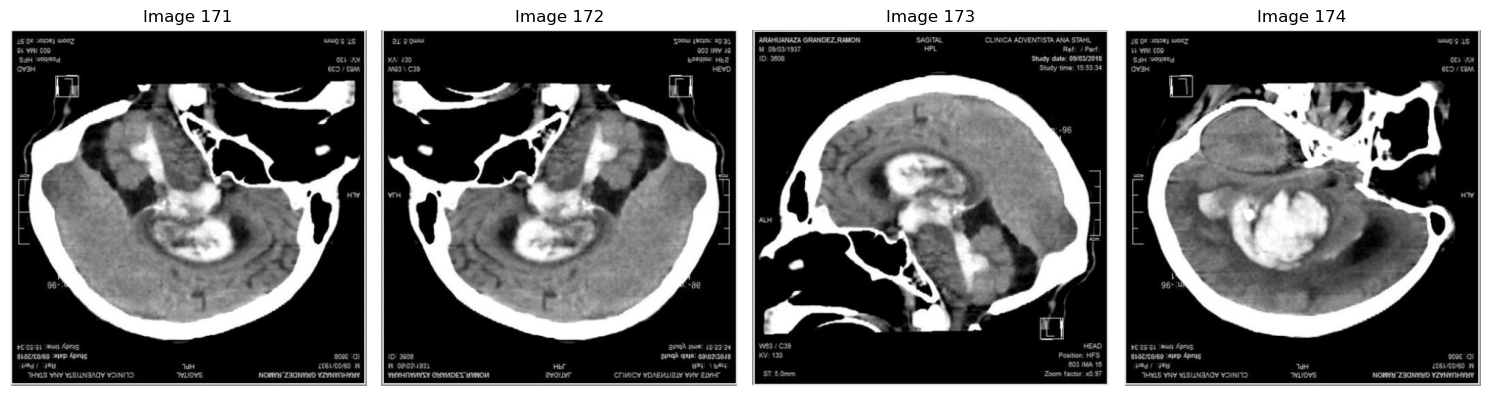

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the range of image numbers
start = 171
end = 174

# Directory and file pattern
directory = 'Dataset/train/ct_tumor/'
file_pattern = 'ct_tumor ({}).jpg'

# Load the images
images = [Image.open(f"{directory}{file_pattern.format(i)}") for i in range(start, end + 1)]

# Create a figure and axes for side-by-side display
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))  # 1 row, 7 columns

# Loop through the images and display them
for ax, img, num in zip(axes, images, range(start, end + 1)):
    ax.imshow(img)
    ax.axis('off')  # Hide axes for cleaner look
    ax.set_title(f"Image {num}")

# Show the plot
plt.tight_layout()
plt.show()


## EDA Findings

Starting from the most evident characteristics and delving deeper, we can conclude that the dataset includes:

- CT scan and MRI samples from both healthy patients and those with tumors.
- Samples from different sources, resulting in variations such as:
    - The inclusion of patient data within the image.
    - Different cuts and perspectives (frontal, top, lateral, etc.).
    - Images in different modes, specifically some in "L" mode (grayscale) and most in "RGB" mode (colored).
    - Images of varying sizes.
- Data augmentation has already been **partialy** applied, as there are cases where an image has been rotated and included in the dataset.

## EDA Conclusions and action Plan

Taking into account the previous findings and the number of images available in the dataset, we will leverage the transfer learning technique by using the Xception model from TensorFlow-Keras applications as a base, benefiting from its training on millions of images.

It is important to note that to use this model, we must adjust the input images to meet the specifications used during the training of the base model.

Action Plan:

1. Normalize Function:
    - Convert images to RGB if they are in grayscale (L) or RGBA.

2. Preprocessing:
    - Normalize the images to RGB and apply preprocess_input for compatibility with Xception.

3. ImageDataGenerator:
    - Use the preprocessing_function to seamlessly integrate normalization and preprocessing.

4. Load Data:
    - Load images from the designated folders.

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"


In [11]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator


E0000 00:00:1736183461.002368   39363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736183461.009334   39363 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
# Function to normalize images to RGB format
def normalize_image(image):
    if tf.shape(image)[-1] == 1:  # Grayscale mode (L)
        image = tf.image.grayscale_to_rgb(image)
    elif tf.shape(image)[-1] == 4:  # RGBA mode
        image = image[..., :3]  # Remove the alpha channel
    return image

# Combined function to normalize and preprocess
def custom_preprocessing(image):
    image = normalize_image(image)  # Ensure RGB format
    return preprocess_input(image)  # Preprocess for Xception

# Configure ImageDataGenerator
datagen = ImageDataGenerator(preprocessing_function=custom_preprocessing)

In [13]:
# Load data

# Train
train_generator = datagen.flow_from_directory(
    'Dataset/train/',
    target_size=(299, 299),  # Expected size for Xception
    batch_size=32,
    class_mode='categorical'
)

# test
test_generator = datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(299, 299),  # Expected size for Xception
    batch_size=32,
    class_mode='categorical'
)

# Validation
val_generator = datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(299, 299),  # Expected size for Xception
    batch_size=32,
    class_mode='categorical'
)

Found 6730 images belonging to 7 classes.
Found 1445 images belonging to 7 classes.
Found 1445 images belonging to 7 classes.


In [14]:
train_generator.class_indices

{'ct_healthy': 0,
 'ct_tumor': 1,
 'mri_glioma': 2,
 'mri_healthy': 3,
 'mri_meningioma': 4,
 'mri_pituitary': 5,
 'mri_tumor': 6}

# Base model Prediction

Let's make a prediction with the base model as it is, just to see the results

First we need to load a single image and preprocess it as the required format expected by Xception model

In [15]:
from tensorflow.keras.preprocessing.image import load_img

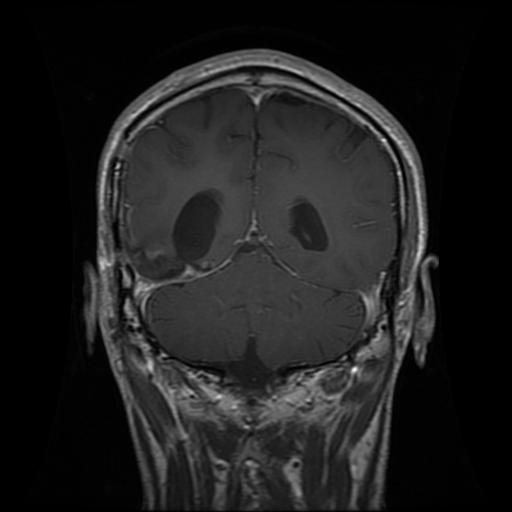

In [16]:
path = 'Dataset/train/mri_glioma'
name = 'glioma (453).jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [17]:
img = load_img(fullname, target_size=(299, 299))

Convert image to Array

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x = np.array(img)
x.shape

(299, 299, 3)

Load model

In [20]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1736183499.682174   39363 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Create a matrix instance (in this test is only 1 entity within the matrix)

In [21]:
X = np.array([x])

In [22]:
X.shape

(1, 299, 299, 3)

we have to adjust the image, in this case the mode is RGB so we dont need to transform its mode

In [23]:
X = preprocess_input(X)

In [24]:
pred = model.predict(X)

I0000 00:00:1736183508.954900   39957 service.cc:148] XLA service 0x7f54a0002560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736183508.954970   39957 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
I0000 00:00:1736183509.305952   39957 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


I0000 00:00:1736183517.370376   39957 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [25]:
decode_predictions(pred)

[[('n03124043', 'cowboy_boot', np.float32(0.071814924)),
  ('n03916031', 'perfume', np.float32(0.04239158)),
  ('n04192698', 'shield', np.float32(0.022683555)),
  ('n04487394', 'trombone', np.float32(0.022625556)),
  ('n02823750', 'beer_glass', np.float32(0.020048799))]]

We are getting unaccurate predictions, this is because the model was trained without this kind of images, so we'll proceed with transfer learning. And maybe we could make a test run with a model from scratch.

# Model Training

## Starting Point

I'll use the Xception architecture as the base model, taking advantage of its depthwise separable convolutions to extract detailed and efficient feature representations from the input images. Xception has consistently shown strong performance in image classification tasks and is well-suited for transfer learning due to its generalization capabilities and pretrained weights on the ImageNet dataset. (Also it has the best performance in the keras documentation, and was the one used on lesson 8 :D )

The base model will be adapted for our specific classification task by removing its top layers and adding custom ones. First, I will use a GlobalAveragePooling2D layer to reduce the spatial dimensions of the feature maps and extract a compact representation of the features. Next, I’ll include a Dense layer with 256 units and ReLU activation to allow the model to learn patterns specific to our dataset. Finally, a Dense layer with 7 units and softmax activation will output the probabilities for the 7 classes in our dataset.

In [26]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load Xception base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze base model for initial training
base_model.trainable = False

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [27]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


E0000 00:00:1736183555.016107   39957 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183555.233426   39957 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183555.450236   39957 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183555.660215   39957 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183555.857502   39957 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

 36/211 ━━━━━━━━━━━━━━━━━━━━ 1:18 448ms/step - accuracy: 0.5186 - loss: 1.2422

E0000 00:00:1736183592.881044   39955 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183593.073741   39955 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183593.288273   39955 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183593.544420   39955 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.7185 - loss: 0.7514

E0000 00:00:1736183700.475395   39953 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183700.691275   39953 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183700.873127   39953 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183701.063385   39953 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736183701.239962   39953 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

211/211 ━━━━━━━━━━━━━━━━━━━━ 172s 652ms/step - accuracy: 0.7189 - loss: 0.7504 - val_accuracy: 0.8796 - val_loss: 0.3335
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 109s 517ms/step - accuracy: 0.8783 - loss: 0.3296 - val_accuracy: 0.8893 - val_loss: 0.3000
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 110s 517ms/step - accuracy: 0.9054 - loss: 0.2771 - val_accuracy: 0.9073 - val_loss: 0.2573
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 108s 514ms/step - accuracy: 0.9122 - loss: 0.2275 - val_accuracy: 0.9031 - val_loss: 0.2621
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 110s 524ms/step - accuracy: 0.9274 - loss: 0.1938 - val_accuracy: 0.9107 - val_loss: 0.2417
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 123s 586ms/step - accuracy: 0.9411 - loss: 0.1613 - val_accuracy: 0.8983 - val_loss: 0.2761
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 122s 579ms/step - accuracy: 0.9441 - loss: 0.1463 - val_accuracy: 0.9073 - val_loss: 0.2473
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 111s 529ms/step - accuracy: 0.9499 - loss: 0.13

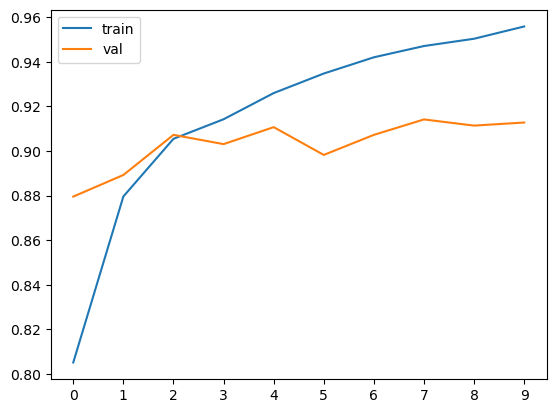

In [28]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

At this point we have a nice performance level (over 90% accuracy), so we can make some test, for a single image and for the test dataset

In [29]:
pred_one = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [30]:
pred_one.round(3)

array([[0.   , 0.   , 0.925, 0.   , 0.039, 0.   , 0.036]], dtype=float32)

In [31]:
classes = [
    'ct_healthy',
    'ct_tumor',
    'mri_glioma',
    'mri_healthy',
    'mri_meningioma',
    'mri_pituitary',
    'mri_tumor'
]

In [32]:
dict(zip(classes, pred_one[0].round(3)))

{'ct_healthy': np.float32(0.0),
 'ct_tumor': np.float32(0.0),
 'mri_glioma': np.float32(0.925),
 'mri_healthy': np.float32(0.0),
 'mri_meningioma': np.float32(0.039),
 'mri_pituitary': np.float32(0.0),
 'mri_tumor': np.float32(0.036)}

Theres a huge difference compared to the prediction made before training, in this recent attempt, the model identifies the image as mri_glioma with 'mri_glioma': np.float32(0.925),

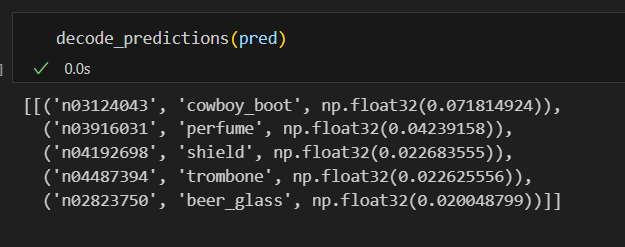

Also, lets try with the test dataset

In [33]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 455ms/step - accuracy: 0.9207 - loss: 0.2293
Test Accuracy: 0.91


## Hyperparameter tuning 

I'll try some variations of these parameters:

- Learning Rate
- Add an inner layer with different sizes
- Dropout rate

### Learning Rate

In [34]:
from tensorflow import keras

In [35]:
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [36]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_generator, epochs=10, validation_data=val_generator)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 129s 571ms/step - accuracy: 0.6258 - loss: 1.1226 - val_accuracy: 0.8381 - val_loss: 0.5274
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 111s 526ms/step - accuracy: 0.8359 - loss: 0.5015 - val_accuracy: 0.8567 - val_loss: 0.4257
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 122s 580ms/step - accuracy: 0.8635 - loss: 0.4103 - val_accuracy: 0.8761 - val_loss: 0.3729
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 142s 674ms/step - accuracy: 0.8786 - loss: 0.3613 - val_accuracy: 0.8768 - val_loss: 0.3498
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 139s 660ms/step - accuracy: 0.8934 - loss: 0.3229 - val_accuracy: 0.8879 - val_loss: 0.3242
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 137s 649ms/step - accuracy: 0.8930 - loss: 0.3028 - val_accuracy: 0.8886 - val_loss: 0.3147
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 141s 671ms/step - accuracy: 0.9068 - loss: 0.2772 - val_accuracy: 0.8990 - val_loss: 0.2872
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 140s 663ms/step - accuracy: 0

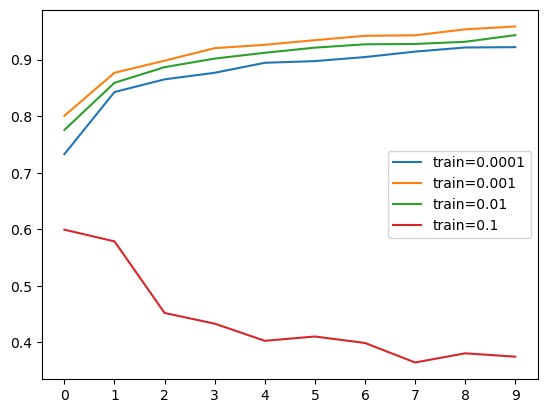

In [37]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

It seems that we're getting the best performance with a learning rate of 0.001 and the worst is 0.1, so let's discard the latter and graph to see more detail

In [38]:
del scores[0.1]

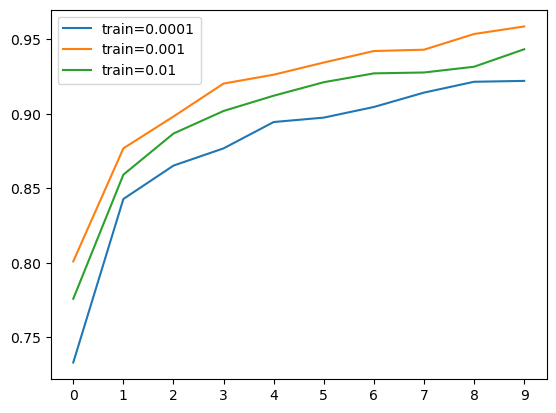

In [41]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

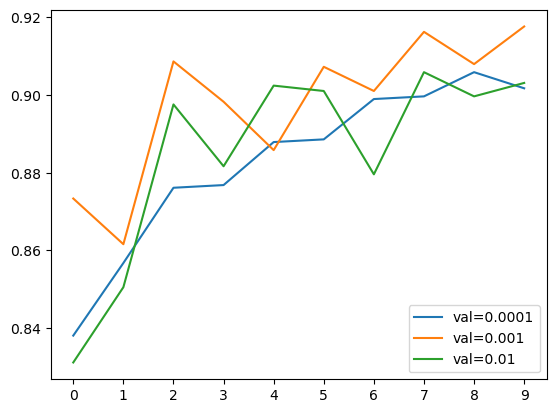

In [42]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

0.0001 looks promising with a steady upward trend, but it's taking too long to converge. I’ve chosen to use 0.001 as it strikes a good balance between learning speed and overall performance.

Best parameters:

- Learning rate = 0.001

From this point on, I'll activate the checkpoint flag in order to save the best model achieved

### Additional Layer

Adding an inner layer and testing different sizes

In [43]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(size_inner, activation='relu'),
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [44]:
import time

In [45]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.weights.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [46]:
%%time
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_generator, epochs=10, validation_data=val_generator,callbacks=[checkpoint])
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 101s 449ms/step - accuracy: 0.6632 - loss: 0.9554 - val_accuracy: 0.8457 - val_loss: 0.4459
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 87s 410ms/step - accuracy: 0.8502 - loss: 0.4301 - val_accuracy: 0.8394 - val_loss: 0.4211
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 87s 412ms/step - accuracy: 0.8802 - loss: 0.3547 - val_accuracy: 0.8803 - val_loss: 0.3118
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 88s 416ms/step - accuracy: 0.8958 - loss: 0.2849 - val_accuracy: 0.8962 - val_loss: 0.2953
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 87s 413ms/step - accuracy: 0.8937 - loss: 0.2619 - val_accuracy: 0.8983 - val_loss: 0.2794
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 85s 405ms/step - accuracy: 0.8983 - loss: 0.2564 - val_accuracy: 0.8976 - val_loss: 0.2526
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 90s 428ms/step - accuracy: 0.9289 - loss: 0.1926 - val_accuracy: 0.8471 - val_loss: 0.4015
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 106s 500ms/step - accuracy: 0.9212 - lo

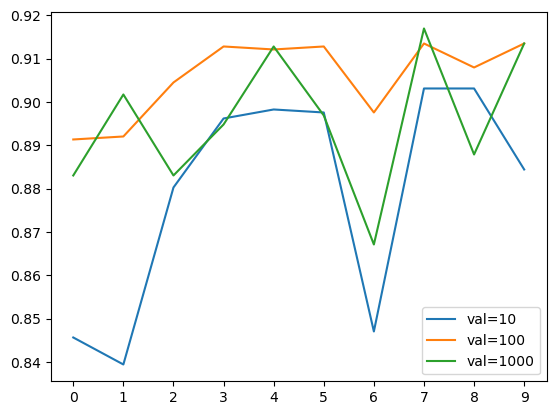

In [47]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

The best performance is achieved with an additional layer of size 100, as it demonstrates more stable and accurate results. Although the model with size 1000 reached a performance peak at epoch #7, I will choose size 100, prioritizing stability.

Best parameters:

- Learning rate = 0.001
- Inner Dense Layer size = 100

### Dropout

Now, I will explore the model by applying the dropout technique, which, in theory, will help mitigate potential overfitting effects. Additionally, in this test, I will increase the number of epochs to 20, as it is expected that the model will learn more slowly due to the missing information introduced by dropout at each iteration.


In [51]:
from tensorflow.keras.layers import Dropout

In [52]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.weights.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [50]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(size_inner, activation='relu'),
        Dropout(droprate), 
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [53]:
%%time
learning_rate = 0.001
size_inner = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size_inner,
        droprate=droprate
    )
    history = model.fit(train_generator, epochs=20, validation_data=val_generator,callbacks=[checkpoint])
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 168s 757ms/step - accuracy: 0.7156 - loss: 0.7577 - val_accuracy: 0.8547 - val_loss: 0.4004
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 155s 735ms/step - accuracy: 0.8759 - loss: 0.3456 - val_accuracy: 0.8872 - val_loss: 0.3073
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 150s 711ms/step - accuracy: 0.9020 - loss: 0.2698 - val_accuracy: 0.8955 - val_loss: 0.2688
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 150s 710ms/step - accuracy: 0.9179 - loss: 0.2158 - val_accuracy: 0.8907 - val_loss: 0.2974
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 150s 711ms/step - accuracy: 0.9193 - loss: 0.1958 - val_accuracy: 0.9087 - val_loss: 0.2375
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 153s 725ms/step - accuracy: 0.9310 - loss: 0.1731 - val_accuracy: 0.8934 - val_loss: 0.2567
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 144s 684ms/step - accuracy: 0.9409 - loss: 0.1464 - val_accuracy: 0.9066 - val_loss: 0.2475
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 150s 709ms/step - accuracy: 0.94

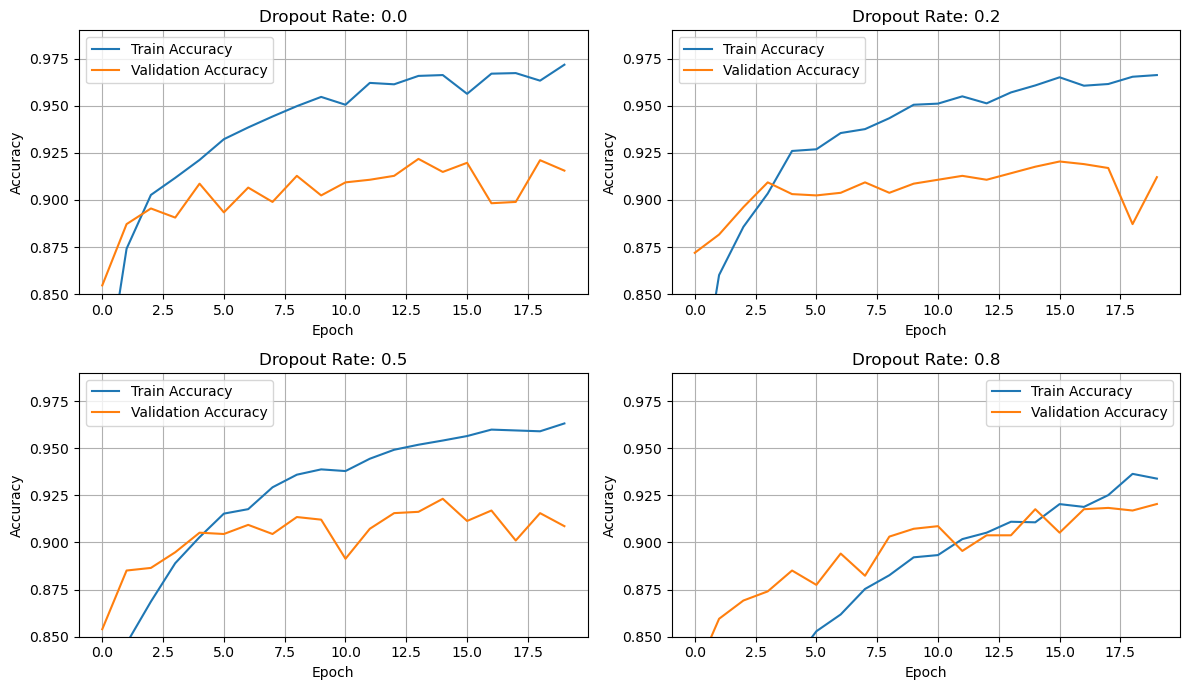

In [54]:
import matplotlib.pyplot as plt

dropouts = [0.0, 0.2, 0.5, 0.8]

fig, axes = plt.subplots(2, 2, figsize=(12, 7))


for ax, droprate in zip(axes.flatten(), dropouts):
    hist = scores[droprate]
    
    ax.plot(hist['accuracy'], label='Train Accuracy')
    ax.plot(hist['val_accuracy'], label='Validation Accuracy')
    
    ax.set_title(f'Dropout Rate: {droprate}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)

    ax.set_ylim(0.85, 0.99)
    ax.set_yticks([0.85, 0.875, 0.90, 0.925, 0.95, 0.975])

plt.tight_layout()
plt.show()


In this case, there's no obvious choice, so I'll approach it in two steps:

- Discarding 0.0: A dropout rate of 0.0 is excluded because applying at least some regularization is necessary to mitigate overfitting effects.
- Discarding 0.8: A dropout rate of 0.8 is excluded because it slows down learning and results in more irregular performance.

In the next step, I'll compare the mean and standard deviation of the validation accuracy for the remaining options.

In [55]:
import pandas as pd

dropouts = [0.2, 0.5]
stats = {}

for droprate in dropouts:
    hist = scores[droprate]
    
    data = pd.DataFrame({
        'Train Accuracy': hist['accuracy'],
        'Validation Accuracy': hist['val_accuracy']
    })
    
    stats[droprate] = data.describe()

for droprate, stat in stats.items():
    print(f"Dropout Rate: {droprate}")
    print(stat)
    print("\n")


Dropout Rate: 0.2
       Train Accuracy  Validation Accuracy
count       20.000000            20.000000
mean         0.932229             0.905606
std          0.045424             0.012744
min          0.781278             0.871972
25%          0.926672             0.902941
50%          0.950817             0.909343
75%          0.960661             0.913149
max          0.966270             0.920415


Dropout Rate: 0.5
       Train Accuracy  Validation Accuracy
count       20.000000            20.000000
mean         0.921092             0.903841
std          0.052965             0.015636
min          0.742496             0.853979
25%          0.912184             0.899481
50%          0.938336             0.907958
75%          0.954681             0.914014
max          0.963150             0.923183




I'm choosing Dropout Rate of 0.2 as it shows a higher mean and a lower standar deviation.

Best parameters:

- Learning rate = 0.001
- Inner Dense Layer size = 100
- Dropout Rate = 0.2

### Data Augmentation

Now I'll try some data augmentation. I just have to take into account that there are some images in the dataset that had already been augmented.

In [56]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.weights.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [57]:
def load_images(parameter):
    datagen = ImageDataGenerator(**parameter)
    train_generator = datagen.flow_from_directory(
        'Dataset/train/',
        target_size=(299, 299),  # Expected size for Xception
        batch_size=32,
        class_mode='categorical',
    )
    return train_generator

In [58]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(size_inner, activation='relu'),
        Dropout(droprate), 
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [59]:
%%time
learning_rate = 0.001
size_inner = 100
droprate=0.2

scores = {}

parameters1 = [
    {"rotation_range": 20},
    {"width_shift_range": 0.2},
    {"height_shift_range": 0.2}
]

parameters2 = [
    {"shear_range": 0.2},
    {"zoom_range": 0.2},
    {"horizontal_flip": True}
]

for p_ in parameters1:
    print(p_)

    train_generator = load_images(p_)

    model = make_model(learning_rate=learning_rate,size_inner=size_inner,droprate=droprate)
    history = model.fit(train_generator, epochs=10, validation_data=val_generator,callbacks=[checkpoint])

    scores[str(p_)] = history.history

    print()
    print()

for p_ in parameters2:
    print(p_)

    train_generator = load_images(p_)

    model = make_model(learning_rate=learning_rate,size_inner=size_inner,droprate=droprate)
    history = model.fit(train_generator, epochs=10, validation_data=val_generator,callbacks=[checkpoint])

    scores[str(p_)] = history.history

    print()
    print()

{'rotation_range': 20}
Found 6730 images belonging to 7 classes.
Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 140s 626ms/step - accuracy: 0.5437 - loss: 1.6442 - val_accuracy: 0.1813 - val_loss: 1.8610
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 128s 607ms/step - accuracy: 0.7096 - loss: 0.7704 - val_accuracy: 0.2021 - val_loss: 2.0840
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 132s 627ms/step - accuracy: 0.7611 - loss: 0.6574 - val_accuracy: 0.1931 - val_loss: 2.3032
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 103s 490ms/step - accuracy: 0.7770 - loss: 0.5970 - val_accuracy: 0.1446 - val_loss: 2.1492
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 105s 499ms/step - accuracy: 0.7935 - loss: 0.5437 - val_accuracy: 0.2256 - val_loss: 1.9804
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 104s 491ms/step - accuracy: 0.8109 - loss: 0.5045 - val_accuracy: 0.2346 - val_loss: 2.0297
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 105s 497ms/step - accuracy: 0.8079 - loss: 0.4796 - val_accuracy: 0.2062 - val_loss: 1.9747
Epoch 8/10


Note: I have conducted several tests at this point, even running the model for 50 epochs. However, in every case, this technique caused the model's performance to worsen. For illustrative purposes, I ran the test for only 10 epochs in this notebook.

Best parameters:

- Learning rate = 0.001
- Inner Dense Layer size = 100
- Dropout Rate = 0.2
- Data Augmentation = None